# Violin plots for matched and unmatched pre/post NACT CD8, NK, and Cytotoxic ConsensusTME estimations

Script related to figure 6b

### Aim:
- Plots change and distributions of CD8, NK, and Cytotoxic estimations for matched and unmatched pre/post NACT samples

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

## Get sample labels

### Load file

In [4]:
file_keys = home + 'Data/5/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


In [5]:
len(set(sample_labels.Case_mRNA))

28

In [6]:
matched = [3368,371,9717,8674,2359,564,7765,6965,9347]

sample_labels['Matched'] = sample_labels['Case_mRNA'].isin(matched)

sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds,Matched
Well,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,True
A02,A02_3368B_Liver,3368,Treated,other,out,True
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,True
A04,A04_0371B_R_diaphragm,371,Treated,other,out,True
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,True


## Load consensusTME ssGSEA results

In [7]:
file_nes = home + 'Data/5/ConsensusTME_NACT_NES.txt'

data_nes = pd.read_csv(file_nes, sep='\t')

data_nes.set_index('Term', inplace=True)

data_nes = data_nes.T

data_nes.head()

Term,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells
A01,0.254477,0.160124,0.234120,0.141871,-0.104190,0.092419,0.267011,0.172090,0.181448,0.021926,0.230488,-0.020415,0.109183,0.326882,-0.151260,-0.124588,-0.121056,-0.171317
A02,0.183183,0.086828,0.242725,-0.031062,-0.001942,0.093467,0.283663,0.104845,0.196052,-0.115812,0.259149,-0.025268,0.248861,0.483244,-0.172278,-0.099327,-0.110020,-0.176621
A03,0.328434,0.250783,0.358290,0.359779,0.118276,0.304250,0.409127,0.295066,0.321067,0.041039,0.385862,0.020209,0.301314,0.484968,0.154900,0.098996,0.020995,0.124944
A04,0.222920,0.469283,0.249668,0.385954,0.292186,0.499391,0.284822,0.218594,0.312852,0.306526,0.320554,0.170785,0.433240,0.512587,0.069036,0.082092,0.065898,0.077918
A05,0.158446,0.149997,0.096655,-0.038934,-0.136142,0.034149,0.230793,0.127381,0.204350,-0.153834,0.200675,-0.097319,0.264777,0.253428,-0.212100,-0.169720,-0.180424,-0.287924


In [8]:
data_toplot = pd.concat([sample_labels, data_nes], axis=1)

## Matched box plots

In [9]:
data_toplot_matched = data_toplot[data_toplot.Matched == True]

### CD8

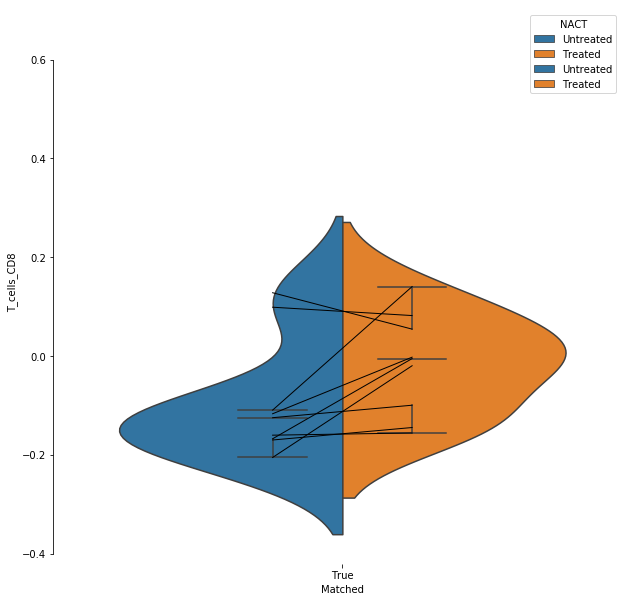

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.violinplot(x="Matched",
               y="T_cells_CD8",
               data=data_toplot_matched,
               inner=None,
               hue="NACT",
               split=True,
               scale="count",
               scale_hue=False,
               zorder=0)

sns.boxplot(x='Matched',
            y="T_cells_CD8",
            data=data_toplot_matched,
            notch=True,
            fliersize=0,
            width=0.5,
            hue="NACT",
            zorder=1)

for i,s in enumerate(data_toplot_matched.index):
    
    y = data_toplot_matched["T_cells_CD8"][i]
    
    if i%2 == 0:
        x = -0.125
        line = [(x,y)]
        
    else:
        x = 0.125
        line.append((x,y))
        (xs, ys) = zip(*line)
        
        if sample_labels['Case_mRNA'][s] in matched:                    
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))
            
        else:
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))

plt.ylim([-0.4,0.7])
sns.despine(trim=True,offset=10)

In [11]:
fig.savefig('../../Figures/main/6/panels/6b_NACT_paired_matched_consensusTME_cd8_comparison.pdf')

### Cytotoxic

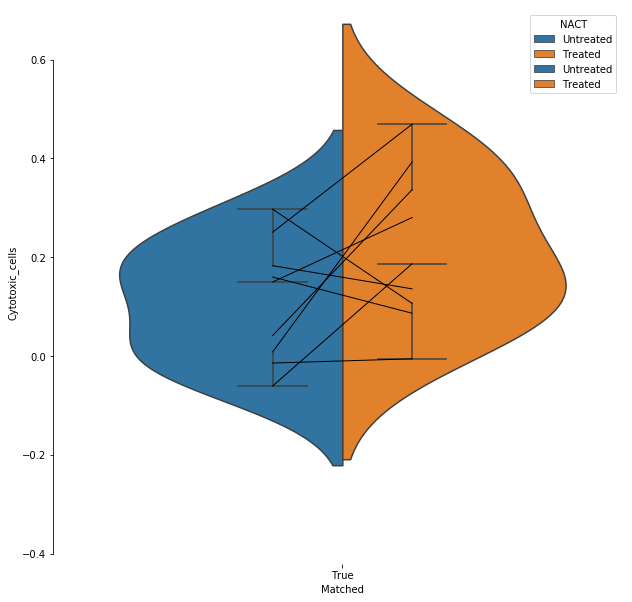

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.violinplot(x="Matched",
               y="Cytotoxic_cells",
               data=data_toplot_matched,
               inner=None,
               hue="NACT",
               split=True,
               scale="count",
               scale_hue=False,
               zorder=0)

sns.boxplot(x='Matched',
            y="Cytotoxic_cells",
            data=data_toplot_matched,
            notch=True,
            fliersize=0,
            width=0.5,
            hue="NACT",
            zorder=1)

for i,s in enumerate(data_toplot_matched.index):
    
    y = data_toplot_matched["Cytotoxic_cells"][i]
    
    if i%2 == 0:
        x = -0.125
        line = [(x,y)]
        
    else:
        x = 0.125
        line.append((x,y))
        (xs, ys) = zip(*line)
        
        if sample_labels['Case_mRNA'][s] in matched:                    
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))
            
        else:
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))

plt.ylim([-0.4,0.7])
sns.despine(trim=True,offset=10)

In [13]:
fig.savefig('../../Figures/main/6/panels/6b_NACT_paired_matched_consensusTME_cytotoxic_comparison.pdf')

### NK

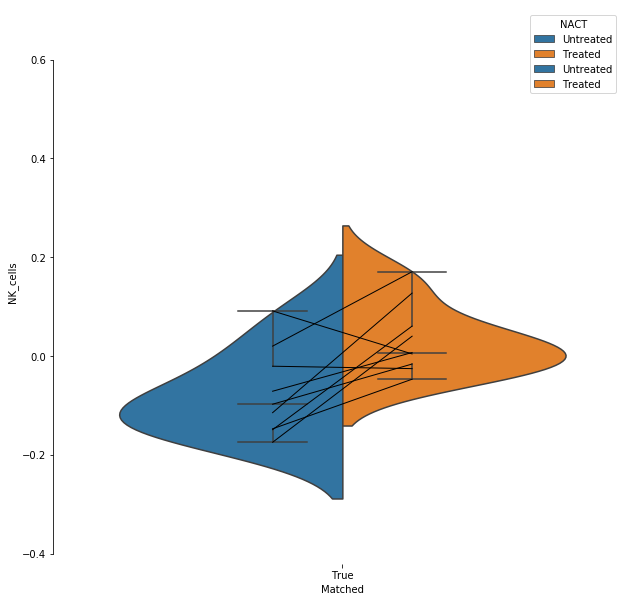

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.violinplot(x="Matched",
               y="NK_cells",
               data=data_toplot_matched,
               inner=None,
               hue="NACT",
               split=True,
               scale="count",
               scale_hue=False,
               zorder=0)

sns.boxplot(x='Matched',
            y="NK_cells",
            data=data_toplot_matched,
            notch=True,
            fliersize=0,
            width=0.5,
            hue="NACT",
            zorder=1)

for i,s in enumerate(data_toplot_matched.index):
    
    y = data_toplot_matched["NK_cells"][i]
    
    if i%2 == 0:
        x = -0.125
        line = [(x,y)]
        
    else:
        x = 0.125
        line.append((x,y))
        (xs, ys) = zip(*line)
        
        if sample_labels['Case_mRNA'][s] in matched:                    
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))
            
        else:
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))

plt.ylim([-0.4,0.7])
sns.despine(trim=True,offset=10)

In [15]:
fig.savefig('../../Figures/main/6/panels/6b_NACT_paired_matched_consensusTME_nk_comparison.pdf')

## Unmatched box plots

In [16]:
data_toplot_unmatched = data_toplot[data_toplot.Matched == False]

### CD8

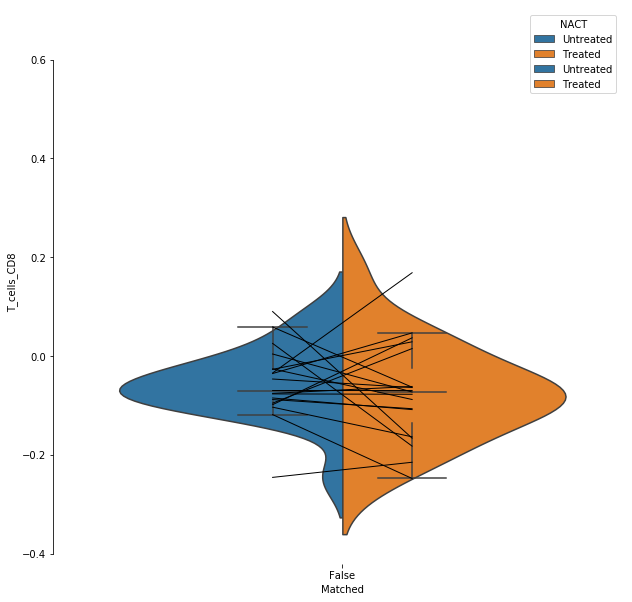

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.violinplot(x="Matched",
               y="T_cells_CD8",
               data=data_toplot_unmatched,
               inner=None,
               hue="NACT",
               split=True,
               scale="count",
               scale_hue=False,
               zorder=0)

sns.boxplot(x='Matched',
            y="T_cells_CD8",
            data=data_toplot_unmatched,
            notch=True,
            fliersize=0,
            width=0.5,
            hue="NACT",
            zorder=1)

for i,s in enumerate(data_toplot_unmatched.index):
    
    y = data_toplot_unmatched["T_cells_CD8"][i]
    
    if i%2 == 0:
        x = -0.125
        line = [(x,y)]
        
    else:
        x = 0.125
        line.append((x,y))
        (xs, ys) = zip(*line)
        
        if sample_labels['Case_mRNA'][s] in matched:                    
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))
            
        else:
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))

plt.ylim([-0.4,0.7])
sns.despine(trim=True,offset=10)

In [18]:
fig.savefig('../../Figures/main/6/panels/6b_NACT_paired_unmatched_consensusTME_cd8_comparison.pdf')

### Cytotoxic

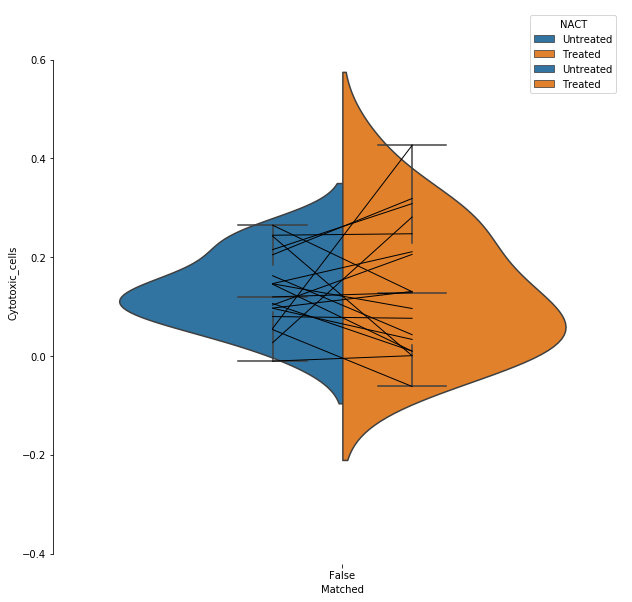

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.violinplot(x="Matched",
               y="Cytotoxic_cells",
               data=data_toplot_unmatched,
               inner=None,
               hue="NACT",
               split=True,
               scale="count",
               scale_hue=False,
               zorder=0)

sns.boxplot(x='Matched',
            y="Cytotoxic_cells",
            data=data_toplot_unmatched,
            notch=True,
            fliersize=0,
            width=0.5,
            hue="NACT",
            zorder=1)

for i,s in enumerate(data_toplot_unmatched.index):
    
    y = data_toplot_unmatched["Cytotoxic_cells"][i]
    
    if i%2 == 0:
        x = -0.125
        line = [(x,y)]
        
    else:
        x = 0.125
        line.append((x,y))
        (xs, ys) = zip(*line)
        
        if sample_labels['Case_mRNA'][s] in matched:                    
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))
            
        else:
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))

plt.ylim([-0.4,0.7])
sns.despine(trim=True,offset=10)

In [20]:
fig.savefig('../../Figures/main/6/panels/6b_NACT_paired_unmatched_consensusTME_cytotoxic_comparison.pdf')

### NK

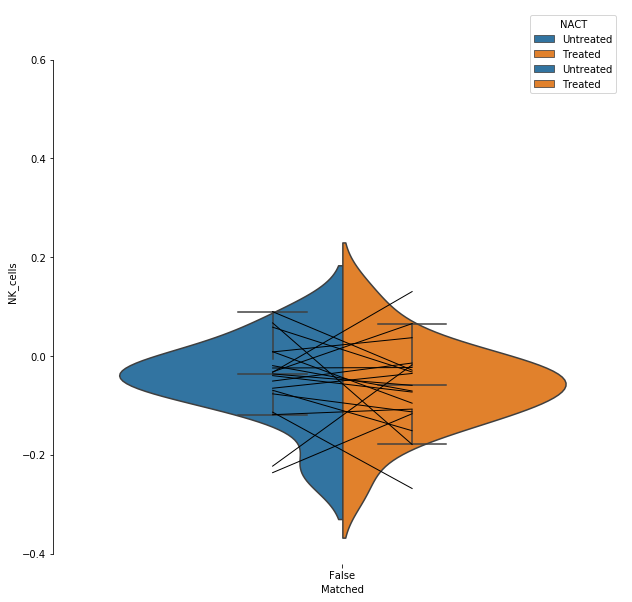

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.violinplot(x="Matched",
               y="NK_cells",
               data=data_toplot_unmatched,
               inner=None,
               hue="NACT",
               split=True,
               scale="count",
               scale_hue=False,
               zorder=0)

sns.boxplot(x='Matched',
            y="NK_cells",
            data=data_toplot_unmatched,
            notch=True,
            fliersize=0,
            width=0.5,
            hue="NACT",
            zorder=1)

for i,s in enumerate(data_toplot_unmatched.index):
    
    y = data_toplot_unmatched["NK_cells"][i]
    
    if i%2 == 0:
        x = -0.125
        line = [(x,y)]
        
    else:
        x = 0.125
        line.append((x,y))
        (xs, ys) = zip(*line)
        
        if sample_labels['Case_mRNA'][s] in matched:                    
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))
            
        else:
            ax.add_line(Line2D(xs,
                               ys,
                               ls='-',
                               linewidth=1,
                               color='k',
                               alpha=1,
                               zorder=2))

plt.ylim([-0.4,0.7])
sns.despine(trim=True,offset=10)

In [22]:
fig.savefig('../../Figures/main/6/panels/6b_NACT_paired_unmatched_consensusTME_nk_comparison.pdf')

# End script